In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from collections import Counter
import nltk
import re
import string
from string import punctuation
from nltk import ngrams
from nltk.tokenize import word_tokenize 

In [76]:
test_df = pd.read_csv('drugsComTest_raw.tsv', sep = '\t')
train_df = pd.read_csv('drugsComTrain_raw.tsv', sep = '\t')

In [77]:
#Merging the two datasets 
frames = [test_df, train_df]
df = pd.concat(frames)


df.rename(columns={'Unnamed: 0':'uniqueid'}, inplace=True )
df.columns = df.columns.str.lower()

df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


# Data Description 

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 161296
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   uniqueid     215063 non-null  int64  
 1   drugname     215063 non-null  object 
 2   condition    213869 non-null  object 
 3   review       215063 non-null  object 
 4   rating       215063 non-null  float64
 5   date         215063 non-null  object 
 6   usefulcount  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


In [79]:
df.dtypes

uniqueid         int64
drugname        object
condition       object
review          object
rating         float64
date            object
usefulcount      int64
dtype: object

In [80]:
df.shape

(215063, 7)

In [81]:
df.describe()

,uniqueid,rating,usefulcount
count,215063.000000,215063.000000,215063.000000
mean,116039.364814,6.990008,28.001004
std,67007.913366,3.275554,36.346069
min,0.000000,1.000000,0.000000
25%,58115.500000,5.000000,6.000000
50%,115867.000000,8.000000,16.000000
75%,173963.500000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


# Removing NA Values

In [82]:
#Searching for NA values 
print("Missing Data Table")
df.isnull().sum()

Missing Data Table


uniqueid          0
drugname          0
condition      1194
review            0
rating            0
date              0
usefulcount       0
dtype: int64

In [83]:
size = df.shape[0]
condition_na = df['condition'].isnull().sum()

print(f'Percentage of NA values in conditions: {condition_na/size*100}%')

Percentage of NA values in conditions: 0.5551861547546533%


In [9]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (213869, 7)


# Sorting Dataset and Removing Duplicates

In [11]:
df.sort_values(['uniqueid'], ascending = True, inplace = True)
df.reset_index(drop = True, inplace = True)
df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,"October 28, 2015",4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,"October 27, 2015",11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,"October 27, 2015",7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,"October 26, 2015",12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,"October 25, 2015",4


In [12]:
df.duplicated().sum()

0

In [13]:
df.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


# Examining Conditions

In [14]:
#Conditions 
unique_conditions = df['condition'].unique()
unique_conditions.sort()
unique_conditions

array(['0</span> users found this comment helpful.',
       '100</span> users found this comment helpful.',
       '105</span> users found this comment helpful.',
       '10</span> users found this comment helpful.',
       '110</span> users found this comment helpful.',
       '11</span> users found this comment helpful.',
       '121</span> users found this comment helpful.',
       '123</span> users found this comment helpful.',
       '12</span> users found this comment helpful.',
       '135</span> users found this comment helpful.',
       '13</span> users found this comment helpful.',
       '142</span> users found this comment helpful.',
       '145</span> users found this comment helpful.',
       '146</span> users found this comment helpful.',
       '14</span> users found this comment helpful.',
       '15</span> users found this comment helpful.',
       '16</span> users found this comment helpful.',
       '17</span> users found this comment helpful.',
       '18</span> us

In [15]:
#There is incorrect conditions that contain 'users found this comment helpful.' and does not contain a condition 
df.loc[df['condition'].str.contains('users found this comment helpful.'), 'condition'] = None

In [16]:
print("Incorrect Html Tagged Conditions Table")
print(df.isnull().sum())

Incorrect Html Tagged Conditions Table
uniqueid          0
drugname          0
condition      1171
review            0
rating            0
date              0
usefulcount       0
dtype: int64


In [17]:
size = df.shape[0]
condition_na = df['condition'].isnull().sum()

print(f'Percentage of Corrupted values in conditions: {condition_na/size*100}%')

Percentage of Corrupted values in conditions: 0.5475314327929715%


In [18]:
df = df.dropna()
print("Missing Value Table")
print(df.isnull().sum())
print()
print('New Data Shape:', df.shape)

Missing Value Table
uniqueid       0
drugname       0
condition      0
review         0
rating         0
date           0
usefulcount    0
dtype: int64

New Data Shape: (212698, 7)


In [19]:
#Counting the number of conditions 
unique_conditions = df['condition'].unique()
unique_conditions.sort()
count_condition = 0

for condition in unique_conditions:
  count_condition += 1 

print("Number of Unique Conditions:", count_condition, "\n")
print("This is The First Few Listed Conditions:",unique_conditions[0:10])

Number of Unique Conditions: 836 

This is The First Few Listed Conditions: ['ADHD' 'AIDS Related Wasting' 'AV Heart Block' 'Abdominal Distension'
 'Abnormal Uterine Bleeding' 'Abortion' 'Acetaminophen Overdose' 'Acne'
 'Actinic Keratosis' 'Acute Coronary Syndrome']


In [20]:
#Most common Conditions 
cond_dict = dict(df['condition'].value_counts())
top_cond = list(cond_dict.keys())[0:10]
cond_freq = list(cond_dict.values())[0:10]

print(f'The most common conditions for drugs are: {top_cond}')

The most common conditions for drugs are: ['Birth Control', 'Depression', 'Pain', 'Anxiety', 'Acne', 'Bipolar Disorde', 'Insomnia', 'Weight Loss', 'Obesity', 'ADHD']


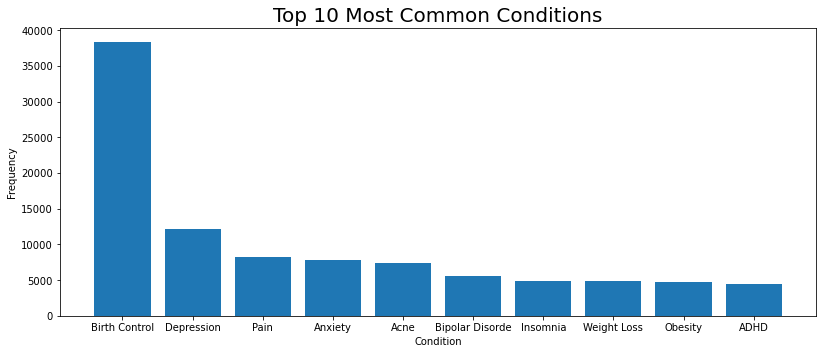

In [21]:
fig = plt.figure() 
ax = fig.add_axes([0,0,1.75,1])

plt.title('Top 10 Most Common Conditions', fontsize=20)
plt.xlabel('Condition')
plt.ylabel('Frequency')

ax.bar(top_cond, cond_freq)
plt.show()

In [22]:
top_condition = pd.DataFrame({'Condition':top_cond, 
             'Frequecy': cond_freq})
top_condition

,Condition,Frequecy
0,Birth Control,38436
1,Depression,12164
2,Pain,8245
3,Anxiety,7812
4,Acne,7435
5,Bipolar Disorde,5604
6,Insomnia,4904
7,Weight Loss,4857
8,Obesity,4757
9,ADHD,4509


In [23]:
print("Most Used Drugs for Birth Control")
df[df['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]

Most Used Drugs for Birth Control


Etonogestrel                          4394
Ethinyl estradiol / norethindrone     3081
Levonorgestrel                        2884
Nexplanon                             2883
Ethinyl estradiol / levonorgestrel    2107
Ethinyl estradiol / norgestimate      2097
Implanon                              1496
Mirena                                1320
Skyla                                 1074
Lo Loestrin Fe                         896
Name: drugname, dtype: int64

In [24]:
print("Most Used Drugs for Depression")
df[df['condition'] == 'Depression']['drugname'].value_counts()[0: 10]

Most Used Drugs for Depression


Bupropion         747
Sertraline        663
Venlafaxine       574
Desvenlafaxine    573
Pristiq           554
Escitalopram      515
Citalopram        513
Vortioxetine      458
Duloxetine        437
Cymbalta          411
Name: drugname, dtype: int64

In [25]:
print("Most Used Drugs for Pain")
df[df['condition'] == "Pain"]['drugname'].value_counts()[0: 10]

Most Used Drugs for Pain


Tramadol                       501
Acetaminophen / hydrocodone    452
Oxycodone                      380
Acetaminophen / oxycodone      363
Tapentadol                     285
Diclofenac                     271
Hydromorphone                  253
Gabapentin                     239
Dilaudid                       212
Nucynta                        206
Name: drugname, dtype: int64

# Examining Drugs

In [31]:
unique_drugs = df['drugname'].unique()
unique_drugs.sort()

count_drugs = 0

for drug in unique_drugs:
  count_drugs += 1 

print("Number of Unique Drugs:", count_drugs, "\n")
print("This is The First Few Listed Conditions:",unique_drugs[0:10])

Number of Unique Drugs: 3654 

This is The First Few Listed Conditions: ['A + D Cracked Skin Relief' 'A / B Otic'
 'Abacavir / dolutegravir / lamivudine' 'Abacavir / lamivudine'
 'Abacavir / lamivudine / zidovudine' 'Abatacept' 'Abilify'
 'Abilify Discmelt' 'Abilify Maintena' 'Abiraterone']


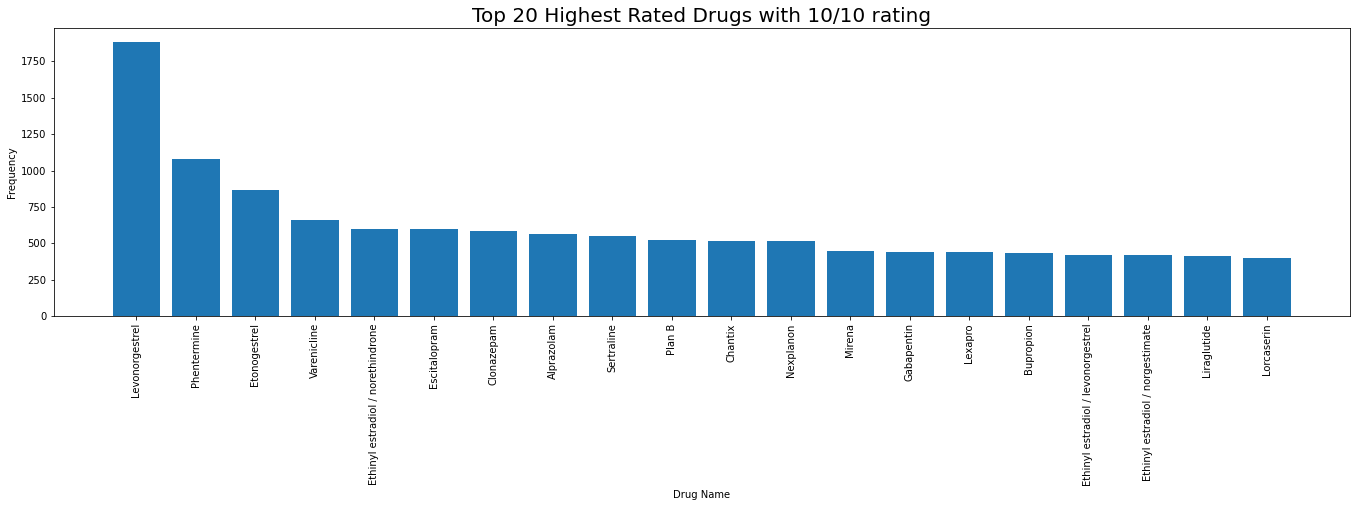

In [56]:
#Top Rated Drugs - find the highest frequency drugs out of 10 
top_rated_drugs = dict(df.loc[df.rating == 10, "drugname"].value_counts())
top_drugname = list(top_rated_drugs.keys())[0:20]
drug_rating = list(top_rated_drugs.values())[0:20]

fig = plt.figure() 
ax = fig.add_axes([0,0,3,1])

plt.title('Top 20 Highest Rated Drugs with 10/10 rating', fontsize=20)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

ax.bar(top_drugname, drug_rating)
plt.xticks(rotation = 90)
plt.show()

In [57]:
top_drugs = pd.DataFrame({'DrugName':top_drugname, 
             'Frequecy': drug_rating})
top_drugs

,DrugName,Frequecy
0,Levonorgestrel,1883
1,Phentermine,1079
2,Etonogestrel,864
3,Varenicline,662
4,Ethinyl estradiol / norethindrone,601
5,Escitalopram,596
6,Clonazepam,586
7,Alprazolam,565
8,Sertraline,550
9,Plan B,524


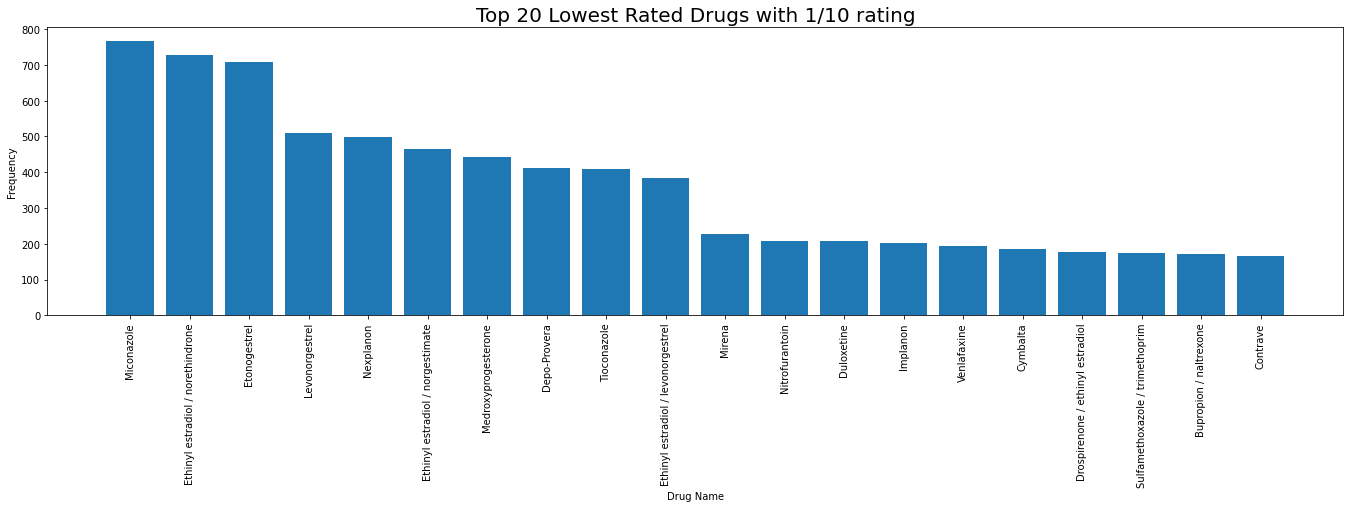

In [58]:
#Top Rated Drugs - find the highest frequency drugs of 1/10 
low_rated_drugs = dict(df.loc[df.rating == 1, "drugname"].value_counts())
low_drugname = list(low_rated_drugs.keys())[0:20]
low_drug_rating = list(low_rated_drugs.values())[0:20]

fig = plt.figure() 
ax = fig.add_axes([0,0,3,1])

plt.title('Top 20 Lowest Rated Drugs with 1/10 rating', fontsize=20)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

ax.bar(low_drugname, low_drug_rating)
plt.xticks(rotation = 90)
plt.show()

In [59]:
low_drugs = pd.DataFrame({'DrugName':low_drugname, 
             'Frequecy': low_drug_rating})
low_drugs

,DrugName,Frequecy
0,Miconazole,767
1,Ethinyl estradiol / norethindrone,728
2,Etonogestrel,707
3,Levonorgestrel,511
4,Nexplanon,499
5,Ethinyl estradiol / norgestimate,464
6,Medroxyprogesterone,443
7,Depo-Provera,411
8,Tioconazole,410
9,Ethinyl estradiol / levonorgestrel,385


# Examining Ratings

In [33]:
print("The Maximum Rating is:", df['rating'].max())
print("The Minimum Rating is:", df['rating'].min())

unique_ratings = df['rating'].unique()
unique_ratings.sort()

print("All of the unique values in rating:", unique_ratings)

The Maximum Rating is: 10.0
The Minimum Rating is: 1.0
All of the unique values in rating: [ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


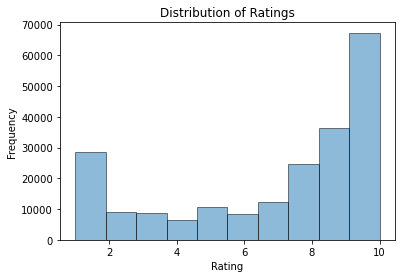

In [34]:
plt.hist(df['rating'], bins = 10, alpha=0.5, histtype='bar', ec='black')

plt.title("Distribution of Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")

plt.show()

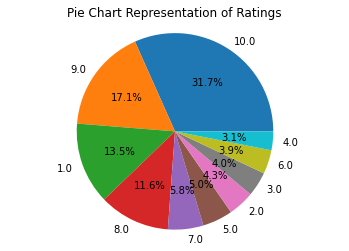

In [40]:
ratings_dict = dict(df['rating'].value_counts())

rating_freq = list(ratings_dict.values())
rating_labels = list(ratings_dict.keys())

plt.pie(rating_freq,labels=rating_labels,autopct='%1.1f%%')

plt.title('Pie Chart Representation of Ratings')
plt.axis('equal')
plt.show()

In [85]:
df['rating'].describe()

count    215063.000000
mean          6.990008
std           3.275554
min           1.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          10.000000
Name: rating, dtype: float64

# Examaning Usfulness Count

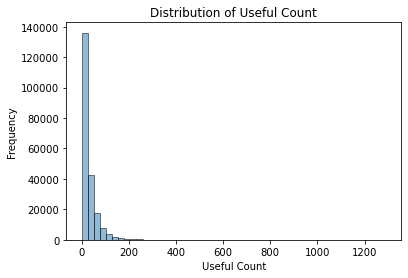

In [41]:
plt.hist(df['usefulcount'], bins = 50,range=[0, 1291],  alpha=0.5, histtype='bar', ec='black')

plt.title("Distribution of Useful Count")
plt.xlabel("Useful Count")
plt.ylabel("Frequency")

plt.show()

In [42]:
df['usefulcount'].describe()

count    212698.000000
mean         28.186819
std          36.455651
min           0.000000
25%           6.000000
50%          16.000000
75%          37.000000
max        1291.000000
Name: usefulcount, dtype: float64

# Examining Date

In [35]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

Text(0.5, 0, 'Year')

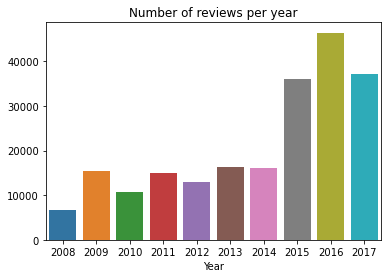

In [44]:
#
date_dist = df['date'].dt.year.value_counts()
date_dist = date_dist.sort_index()

sns_ = sns.barplot(x = date_dist.index, y = date_dist.values)
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year")

In [45]:
date_dist

2008     6620
2009    15406
2010    10810
2011    14959
2012    13017
2013    16244
2014    15997
2015    36011
2016    46411
2017    37223
Name: date, dtype: int64

Text(0, 0.5, 'Rating')

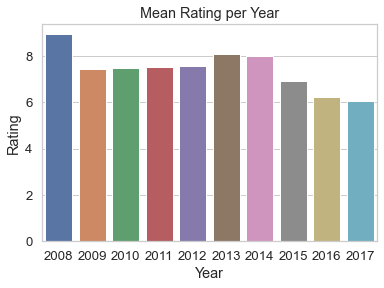

In [46]:
#
mean_rating = dict(df.groupby(df['date'].dt.year)['rating'].mean())

sns.set(font_scale = 1.2, style = 'whitegrid')
sns_ = sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()));
sns_.set_title("Mean Rating per Year")
sns_.set_xlabel("Year")
sns_.set_ylabel("Rating")

In [47]:
mean_rating

{2008: 8.932477341389728,
 2009: 7.427885239517071,
 2010: 7.468085106382978,
 2011: 7.523096463667358,
 2012: 7.561496504570946,
 2013: 8.091972420586062,
 2014: 8.008814152653622,
 2015: 6.926661297936741,
 2016: 6.204671306371335,
 2017: 6.0459662036912665}

<AxesSubplot:xlabel='date', ylabel='rating'>

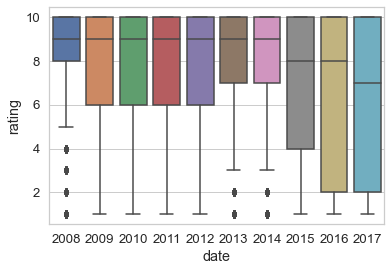

In [48]:
sns.boxplot(y = df['rating'], x = df['date'].dt.year)

# Examining Reviews

In [49]:
#The top 10 most reviewed drugs 
df.drugname.value_counts().nlargest(10)

Levonorgestrel                        4896
Etonogestrel                          4402
Ethinyl estradiol / norethindrone     3619
Nexplanon                             2883
Ethinyl estradiol / norgestimate      2682
Ethinyl estradiol / levonorgestrel    2400
Phentermine                           2077
Sertraline                            1859
Escitalopram                          1739
Mirena                                1647
Name: drugname, dtype: int64

In [50]:
#
print("Number of Reviews per Drug")
# Number of reviews per drug
reviews_per_drug = df.groupby(["drugname"]).agg({
    "uniqueid": pd.Series.nunique
})
reviews_per_drug.describe()

Number of Reviews per Drug


,uniqueid
count,3654.000000
mean,58.209633
std,211.027532
min,1.000000
25%,2.000000
50%,6.000000
75%,30.000000
max,4896.000000


In [51]:
#
print("Number of Reviews per Condition")
# Number of reviews per condition
reviews_per_condition = df.groupby(["condition"]).agg({
    "uniqueid": pd.Series.nunique
})

reviews_per_condition.describe()

Number of Reviews per Condition


,uniqueid
count,836.000000
mean,254.423445
std,1556.872489
min,1.000000
25%,3.000000
50%,13.000000
75%,80.000000
max,38436.000000


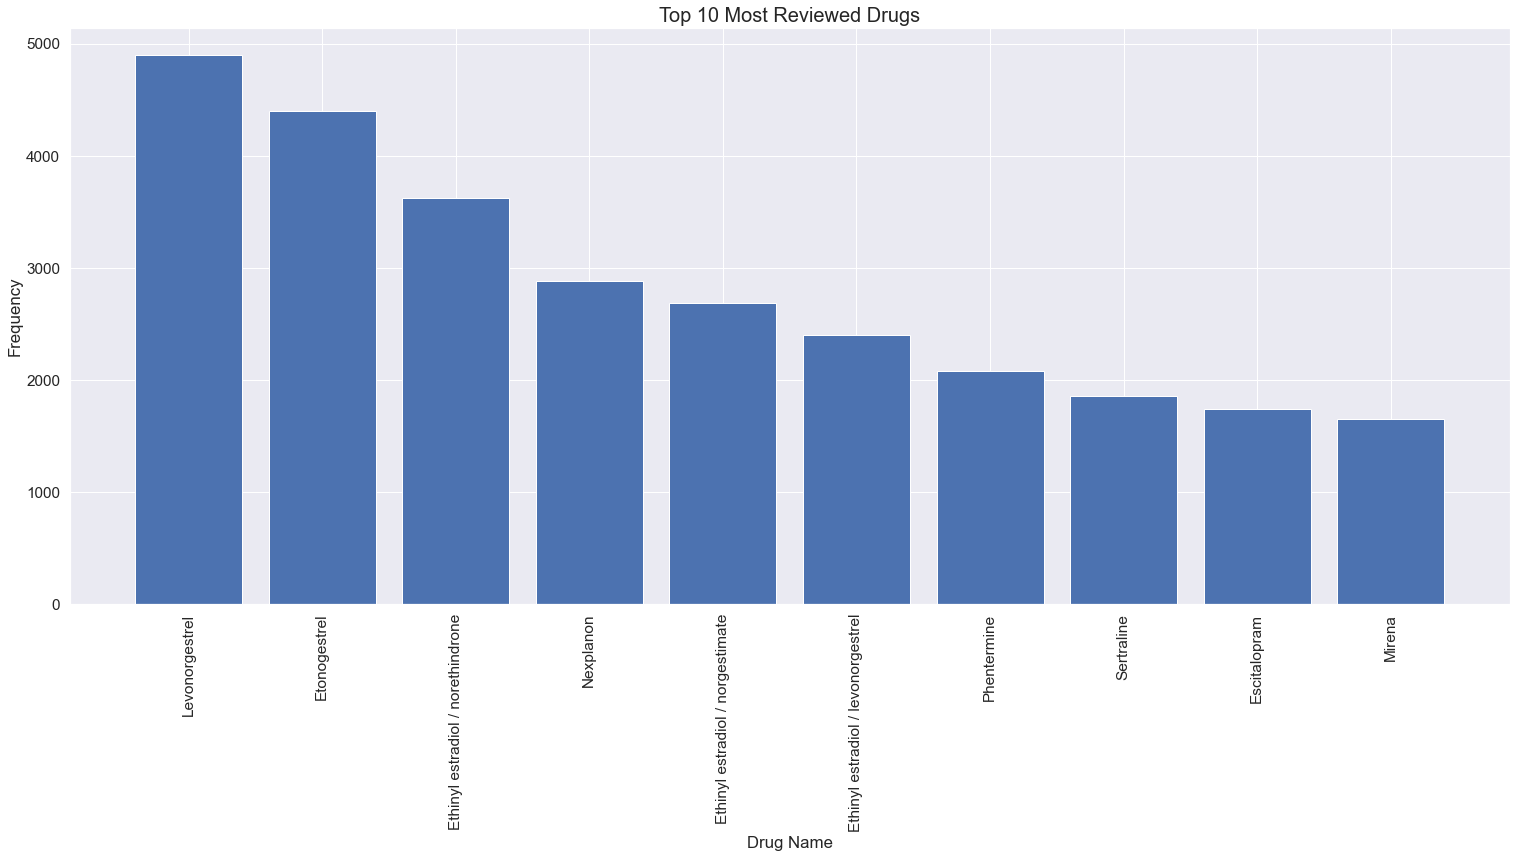

In [80]:
#Most Reviewed Drugs 
drugs = df["drugname"].value_counts()



fig = plt.figure() 
ax = fig.add_axes([0,0,1,1])

plt.title('Top 10 Most Reviewed Drugs', fontsize=20)
plt.xlabel('Drug Name')
plt.ylabel('Frequency')

ax.bar(drugs.index[0:10], drugs[0:10])
plt.xticks(rotation = 90)
plt.show()

# Labeling Sentiments of Reviews

In [36]:
#Disinguising the sentiment of the review based on rating
df.loc[(df['rating'] <= 10), 'sentiment'] = 1
#df.loc[(df['rating'] <= 6), 'sentiment'] = "neutral"
df.loc[(df['rating'] <= 5), 'sentiment'] = 0

In [37]:
df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,2015-10-28,4,0.0
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,2015-10-27,11,1.0
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,2015-10-27,7,1.0
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,2015-10-26,12,1.0
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,2015-10-25,4,0.0


In [39]:
sentm = df['sentiment'].value_counts()
sentm

1.0    149176
0.0     63522
Name: sentiment, dtype: int64

In [40]:
print("Percentage Distribution")
sent_percent = sentm/df.shape[0]*100
sent_percent

Percentage Distribution


1.0    70.135121
0.0    29.864879
Name: sentiment, dtype: float64

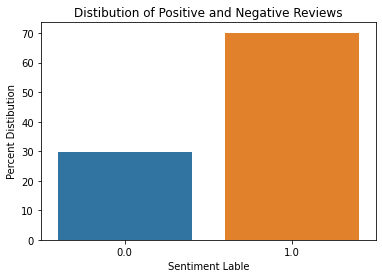

In [60]:
sent_plot = sns.barplot(x=sentm.index, y= sent_percent)

sent_plot.set_title("Distibution of Positive and Negative Reviews")
sent_plot.set_ylabel("Percent Distibution")
sent_plot.set_xlabel("Sentiment Lable");

In [170]:
#!pip install wordcloud

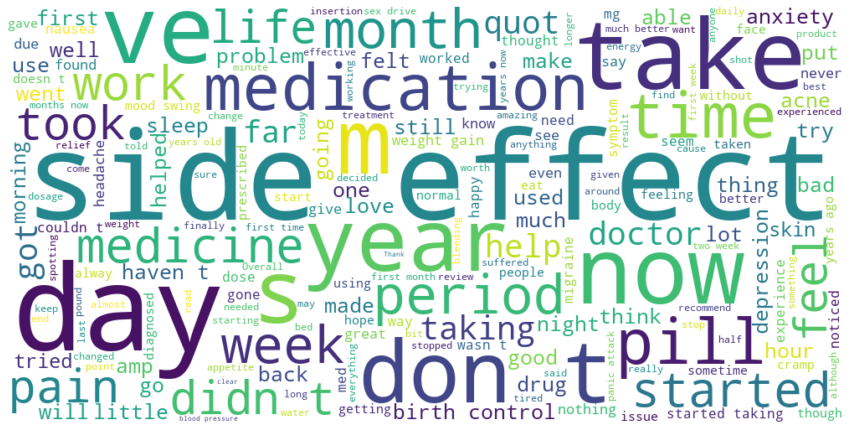

In [57]:
from wordcloud import WordCloud
df_pos = df.loc[df.sentiment == 1, 'review']
pos = (' '.join(df_pos))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(pos)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

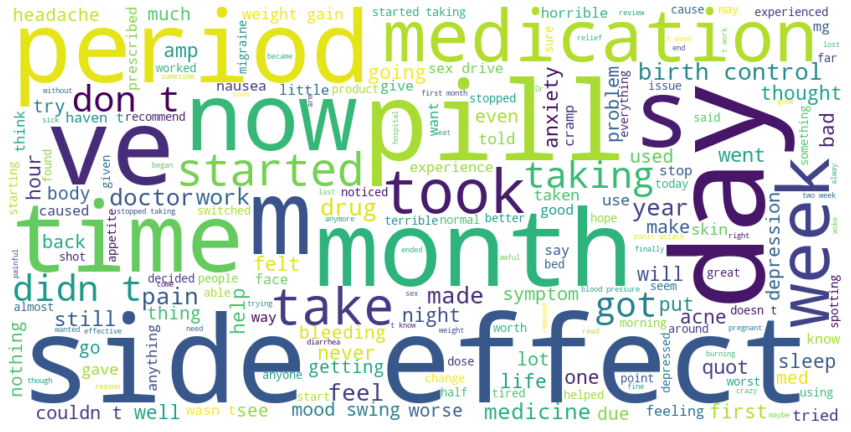

In [173]:
df_neg = df.loc[df.sentiment == 0, 'review']
neg = (' '.join(df_neg))

wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate(neg)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off');

# Preprocessing Reviews

In [42]:
def review_clean(review): 
    lower = review.str.lower()
    pat_rem = lower.str.replace("&#039;", "")
    spec_rem = pat_rem.str.replace(r'[^\w\d\s]',' ')
    ascii_rem = spec_rem.str.replace(r'[^\x00-\x7F]+',' ')
    space_rem = ascii_rem.str.replace(r'^\s+|\s+?$','')
    multiw_remove = space_rem.str.replace(r'\s+',' ')
    df = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return df

In [43]:
df['review_clean'] = review_clean(df['review'])

<ipython-input-42-2164d0ab1bdc>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
<ipython-input-42-2164d0ab1bdc>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
<ipython-input-42-2164d0ab1bdc>:10: FutureWarning: The default value of regex will change from True to False in a future version.
  whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
<ipython-input-42-2164d0ab1bdc>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
<ipython-input-42-2164d0ab1bdc>:14: FutureWarning: The default value of regex will change from True to False in a future version.
  dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')


In [44]:
df.head(5)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment,review_clean
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,2015-10-28,4,0.0,been on the depo injection since january 2015 ...
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,2015-10-27,11,1.0,im 21 years old and recently found out i might...
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,2015-10-27,7,1.0,i have been on the shot 11 years and until a m...
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,2015-10-26,12,1.0,ive had four shots at this point i was on birt...
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,2015-10-25,4,0.0,i had a total of 3 shots i got my first one be...


In [61]:
#from nltk.tokenize import word_tokenize 

In [45]:
from string import punctuation
#Used for remouving punctuation 
df['review_clean'] = df['review_clean'].apply(lambda x: ''.join(word for word in x if word not in punctuation))

In [46]:
#Removing stop words 
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [47]:
stop_words = set(stopwords.words('english'))
df['review_clean'] = df['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [48]:
#Lemmitization and word tokenization 
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]

In [49]:
#nltk.download('wordnet')
df['text_lemmatized'] = df.review_clean.apply(lemmatize_text)

In [51]:
df.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment,review_clean,text_lemmatized
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3.0,2015-10-28,4,0.0,depo injection since january 2015 bleeding sto...,"[depo, injection, since, january, 2015, bleedi..."
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10.0,2015-10-27,11,1.0,im 21 years old recently found might pcos have...,"[im, 21, year, old, recently, found, might, pc..."
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8.0,2015-10-27,7,1.0,shot 11 years month ago never 1 period even sp...,"[shot, 11, year, month, ago, never, 1, period,..."
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9.0,2015-10-26,12,1.0,ive four shots point birth control pills years...,"[ive, four, shot, point, birth, control, pill,..."
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1.0,2015-10-25,4,0.0,total 3 shots got first one leaving hospital g...,"[total, 3, shot, got, first, one, leaving, hos..."


# Count Vectorizing

In [61]:
from sklearn.feature_extraction.text import CountVectorizer

In [62]:
vectorizer =CountVectorizer(analyzer='word')

data = vectorizer.fit_transform(df['review_clean']).astype(np.uint8)

text_dtm = pd.DataFrame(data.toarray(), columns=vectorizer.get_feature_names())
text_dtm.index= df.index

In [63]:
text_dtm.head(10)

,00,000,0000,00001,0001,0007,000iu,000k,000lbs,000mg,...,zytiga,zytram,zyvox,zzquill,zzz,zzzquil,zzzquill,zzzzap,zzzzz,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:

def wordcloud(data,title):
    wc = WordCloud(width=600, height=530, max_words=150,colormap="Dark2").generate_from_frequencies(data)
    plt.figure(figsize=(10,8))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis("off")
    plt.title('\n'.join(wrap(title,60)),fontsize=13)
    plt.show()

In [73]:
text_dtm=text_dtm.transpose()

for index,product in enumerate(text_dtm.columns):
    wordcloud(text_dtm[product].sort_values(ascending=False),product)

TypeError: argument of type 'int' is not iterable

# TF_IDF

In [52]:
#from sklearn.feature_extraction.text import TfidfVectorizer
#from nltk.corpus import words

In [53]:
#vectorizer = TfidfVectorizer()
#reviews_corpus = vectorizer.fit_transform(df.review_clean)

(212698, 53597)

# N-grams

In [ ]:
#unigram_neg = nltk.ngrams(df.loc[df.sentiment == 0, 'text_lemmatized'], 1)

In [ ]:
#bigram_neg = nltk.ngrams(df.loc[df.sentiment == 0, 'text_lemmatized'], 2) 

In [125]:
#trigram_neg = nltk.ngrams(df.loc[df.sentiment == 0, 'text_lemmatized'], 3)